In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom_test, ttest_1samp, chi2_contingency, ttest_ind, f_oneway

In [2]:
FLAT_FILE_DIR = "../flat_files/"

full_table = pd.read_csv(FLAT_FILE_DIR + "full_table.csv")
event_table = pd.read_csv(FLAT_FILE_DIR + "event_table.csv")
deck_list_table = pd.read_csv(FLAT_FILE_DIR + "deck_list_table.csv")
pilot_table = pd.read_csv(FLAT_FILE_DIR + "pilot_table.csv")
deck_table = pd.read_csv(FLAT_FILE_DIR + "deck_table.csv")
card_table = pd.read_csv(FLAT_FILE_DIR + "card_table.csv")

bad_decks = full_table[~full_table["cardId"].str.contains(standard_sets, regex=True)]["deckId"].unique()

len(bad_decks)

In [46]:
# Common Slices
standard_sets = "eld|thb|znr|iko|khm|m21"
illegal_decks = full_table[
    ~full_table["cardId"].isin(card_table[card_table["standardLegality"] == "legal"]["cardId"])
]["deckId"]

first_place_decks = deck_table[
    (deck_table["rank"] == 1)
    & ~(deck_table["deckId"].isin(illegal_decks))
].copy()
main_decks = full_table[
    (~full_table["name"].isin(["Island", "Mountain", "Forest", "Plains", "Swamp"]))
    & (full_table["slot"] == "md")
    & ~(full_table["deckId"].isin(illegal_decks))
]


In [47]:
deck_table.head()

,deckId,eventId,pilotId,deckUrl,name,rank,archetype,category
0,1,1,3,?e=27938&d=421597&f=ST,Gruul Aggro,1,aggro,gruul
1,2,1,4,?e=27938&d=421598&f=ST,UW Control,2,control,azorius
2,3,2,5,?e=27939&d=421599&f=ST,Red Deck Wins,1,aggro,mono red
3,4,3,6,?e=27940&d=421600&f=ST,Rakdos Aggro,1,aggro,rakdos
4,5,4,7,?e=27925&d=421512&f=ST,Gruul Aggro,1,aggro,gruul


In [48]:
card_table.head()

,setNumber,setName,name,cmc,color,mana_cost,standardLegality,oracle_text,cardId
0,001,eld,Acclaimed Contender,3,W,{2}{W},legal,When Acclaimed Contender enters the battlefiel...,001eld
1,002,eld,All That Glitters,2,W,{1}{W},legal,Enchant creature\nEnchanted creature gets +1/+...,002eld
2,003,eld,Archon of Absolution,4,W,{3}{W},legal,Flying\nProtection from white (This creature c...,003eld
3,004,eld,Ardenvale Paladin,4,W,{3}{W},legal,Adamant — If at least three white mana was spe...,004eld
4,005,eld,Ardenvale Tactician // Dizzying Swoop,3,W,{1}{W}{W} // {1}{W},legal,Flying // Tap up to two target creatures. (The...,005eld


In [49]:
first_place_decks.head()

,deckId,eventId,pilotId,deckUrl,name,rank,archetype,category
0,1,1,3,?e=27938&d=421597&f=ST,Gruul Aggro,1,aggro,gruul
2,3,2,5,?e=27939&d=421599&f=ST,Red Deck Wins,1,aggro,mono red
3,4,3,6,?e=27940&d=421600&f=ST,Rakdos Aggro,1,aggro,rakdos
4,5,4,7,?e=27925&d=421512&f=ST,Gruul Aggro,1,aggro,gruul
12,13,5,15,?e=27918&d=421478&f=ST,Rakdos Control,1,control,rakdos


In [50]:
(event_table.head())

,eventId,name,link,date,latest_set
0,1,FNM @ MTG Arena Campania,https://www.mtgtop8.com/event?e=27938&f=ST,2020-10-30,Zendikar Rising
1,2,Torneios @ Ludo Quest,https://www.mtgtop8.com/event?e=27939&f=ST,2020-10-30,Zendikar Rising
2,3,All Hallow's Eve FNM @ Gamer's Gauntlet,https://www.mtgtop8.com/event?e=27940&f=ST,2020-10-30,Zendikar Rising
3,4,Japan Championship 2020 Autumn Last Chance Tri...,https://www.mtgtop8.com/event?e=27925&f=ST,2020-10-29,Zendikar Rising
4,5,Free Daily @ Owl Central Games,https://www.mtgtop8.com/event?e=27918&f=ST,2020-10-28,Zendikar Rising


In [51]:
full_table.head()

,eventId,name_event,date,deckId,pilotId,name_deck,firstName,lastName,cardId,name,count,color,slot,archetype,category,latest_set
0,1,FNM @ MTG Arena Campania,2020-10-30,1,3,Gruul Aggro,Antimo,Morlando,261znr,Cragcrown Pathway // Timbercrown Pathway,4,GR,md,aggro,gruul,Zendikar Rising
1,1,FNM @ MTG Arena Campania,2020-10-30,1,3,Gruul Aggro,Antimo,Morlando,244eld,Fabled Passage,4,NaN,md,aggro,gruul,Zendikar Rising
2,1,FNM @ MTG Arena Campania,2020-10-30,1,3,Gruul Aggro,Antimo,Morlando,266eld,Forest,9,G,md,aggro,gruul,Zendikar Rising
3,1,FNM @ MTG Arena Campania,2020-10-30,1,3,Gruul Aggro,Antimo,Morlando,262eld,Mountain,5,R,md,aggro,gruul,Zendikar Rising
4,1,FNM @ MTG Arena Campania,2020-10-30,1,3,Gruul Aggro,Antimo,Morlando,115eld,Bonecrusher Giant // Stomp,4,R,md,aggro,gruul,Zendikar Rising


In [52]:
def most_winning_archetypes():
    first_place_decks.loc[first_place_decks["archetype"] == "rogue", "archetype"] = "mill"
    grouped_archetypes = first_place_decks.groupby("archetype")["rank"].sum().reset_index().sort_values(by="rank", ascending=False)
    plt.figure(figsize=(12, 8))
#     sns.barplot(data=grouped_archetypes, x="archetype", y="rank")
    plt.bar(range(len(grouped_archetypes)), grouped_archetypes["rank"])
    plt.xticks(range(len(grouped_archetypes)), grouped_archetypes["archetype"], rotation=30)
    plt.title("Most Winning Archetypes")
    plt.show()

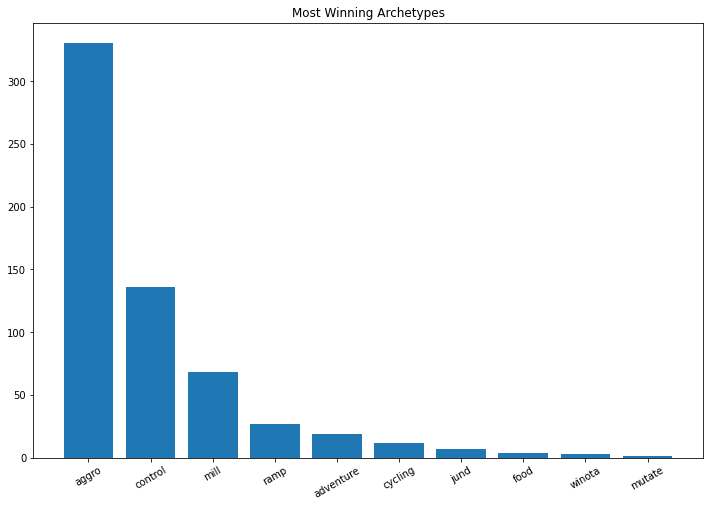

In [53]:
most_winning_archetypes()

In [54]:
def most_winning_colors(df):
    grouped_category = df.groupby("category")["rank"].count().reset_index().sort_values(by="rank", ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(data=grouped_category, x="category", y="rank")
    plt.title("Most Winning Colors")
    plt.xticks(rotation=30)
    plt.show()

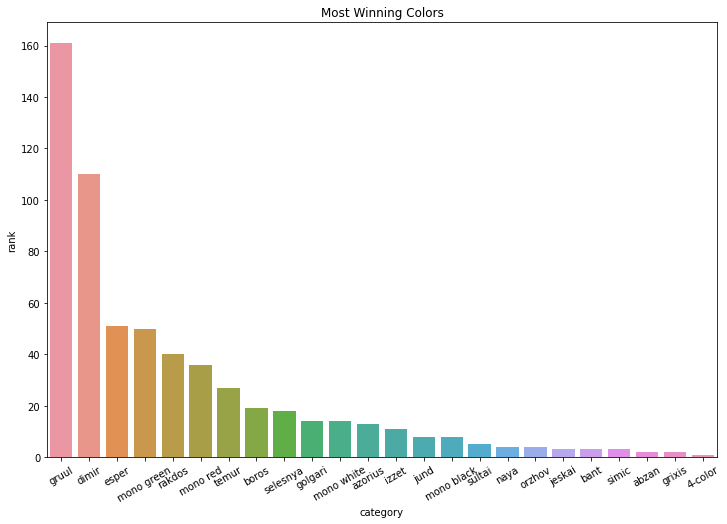

In [55]:
most_winning_colors(first_place_decks)

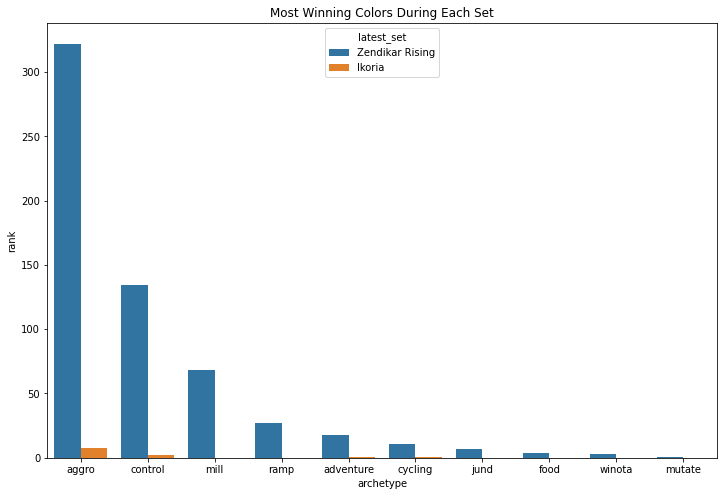

In [56]:
def most_winning_colors_by_set(df):
    merged_table = df.merge(event_table[["eventId", "latest_set"]], on="eventId", suffixes=[None, "_event"])
    grouped_table = merged_table.groupby(["archetype", "latest_set"])["rank"].count().reset_index().sort_values(by="rank", ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(data=grouped_table, x="archetype", y="rank", hue="latest_set")
    plt.title("Most Winning Colors During Each Set")
    plt.show()

most_winning_colors_by_set(first_place_decks)

In [57]:
def what_colors_go_with_archetype(archetypes, colors):
    archetypes = deck_table[deck_table["archetype"].isin(archetypes)]["archetype"]
    colors = deck_table[deck_table["category"].isin(colors)]["category"]
    frequencies = pd.crosstab(archetypes, colors)
    chi2, pval, _, expected = chi2_contingency(frequencies)
    return chi2, pval, frequencies, expected

what_colors_go_with_archetype(["aggro"], ["mono green", "gruul"])

(0.0,
 1.0,
 category   gruul  mono green
 archetype                   
 aggro        512         249,
 array([[512., 249.]]))

In [58]:
def colors_and_archetypes(df, archetype):
    df_archetype = df[df["archetype"] == archetype].copy()
    grouped_table = (
        df_archetype
        .groupby("category")["rank"]
        .count()
        .reset_index()
        .sort_values(by="rank", ascending=False)
    )
    plt.figure(figsize=(8, 5))
    sns.barplot(data=grouped_table, x="category", y="rank")
    plt.title(f"Categories in the Most Winning {archetype.title()} Decks")
    plt.xticks(rotation=30)
    plt.show()

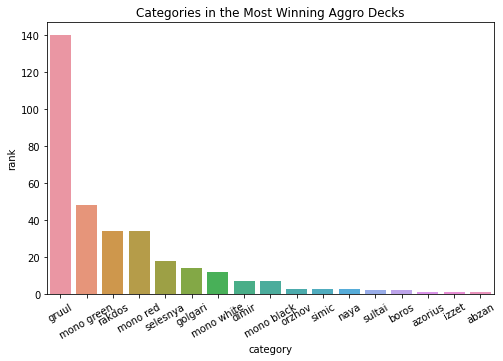

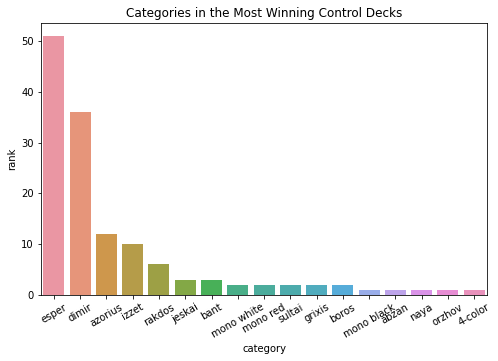

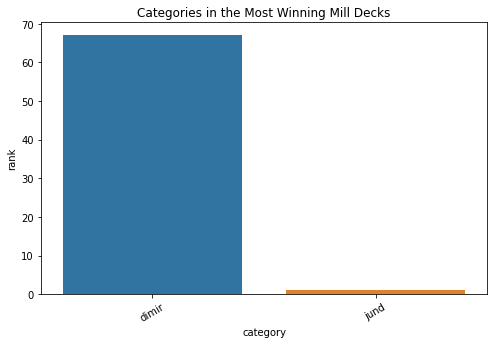

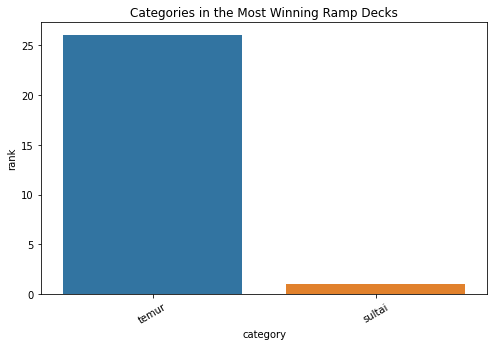

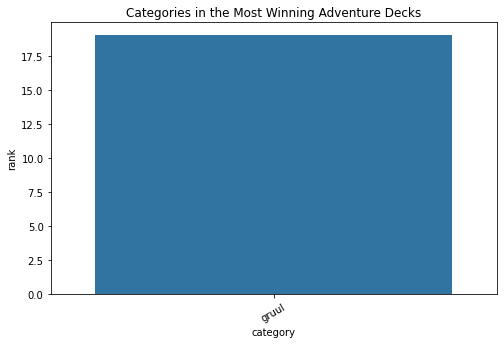

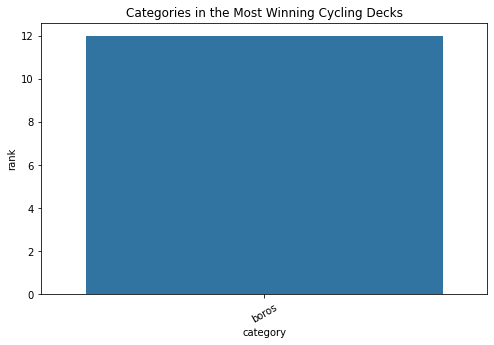

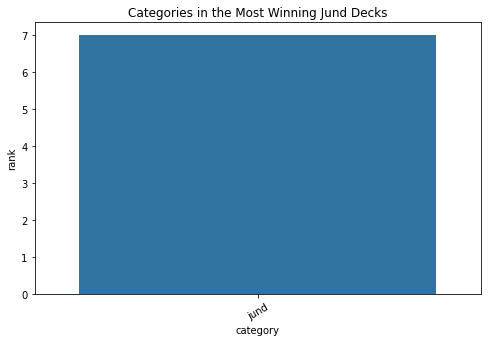

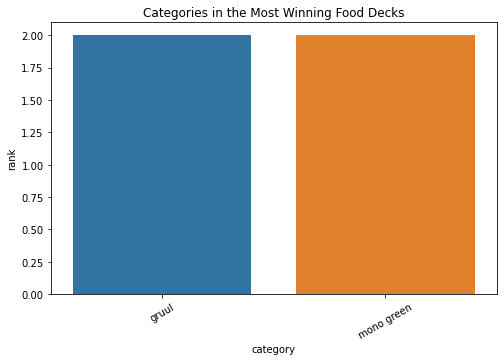

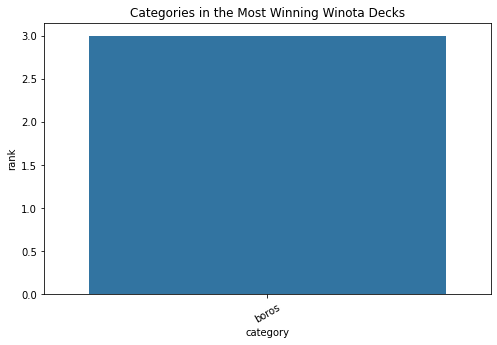

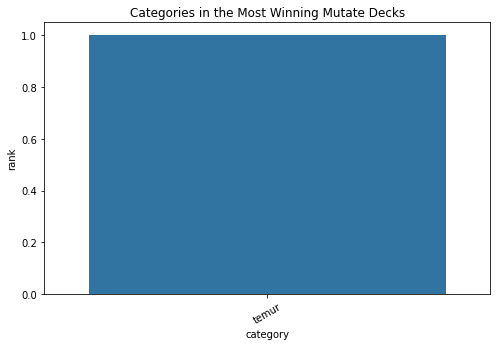

In [59]:
def top10_colors_archetypes(df):
    top10_archetypes = df["archetype"].value_counts().index[:10].tolist()
    for archetype in top10_archetypes:
        colors_and_archetypes(df, archetype)
#         plt.clf()

top10_colors_archetypes(first_place_decks)

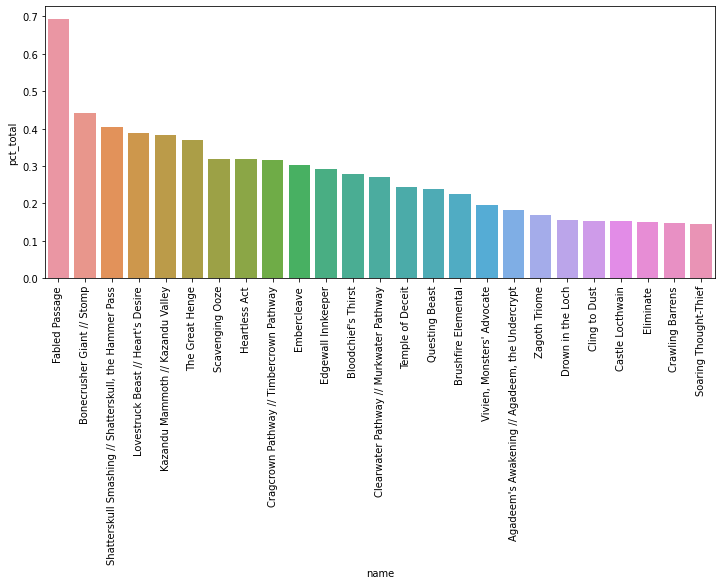

In [60]:
def most_used_cards(df):
    this_full_table = df.copy()
    grouped_table = (
        this_full_table
        .groupby("name")["deckId"]
        .nunique()
        .reset_index()
        .sort_values(by="deckId", ascending=False)
    )
    grouped_table["pct_total"] = grouped_table["deckId"].div(this_full_table["deckId"].nunique())
    plt.figure(figsize=(12, 5))
    sns.barplot(data=grouped_table.iloc[:25], x="name", y="pct_total")
    plt.xticks(rotation=90)
    plt.show()
    
most_used_cards(main_decks)

In [61]:
def most_used_cards_in_archetype(df, archetype):
    this_df = df[df["archetype"] == archetype].copy()
    grouped_df = (
        this_df.groupby("name")["deckId"]
        .nunique()
        .reset_index()
        .sort_values(by="deckId", ascending=False)
    )
    grouped_df["pct_total"] = grouped_df["deckId"] / this_df["deckId"].nunique()
    plt.figure(figsize=(12, 5))
    sns.barplot(data=grouped_df.iloc[:30], x="name", y="pct_total")
    plt.xticks(rotation=90)
    plt.title(f"Most Used Cards in {archetype.title()} Decks")
    plt.show()

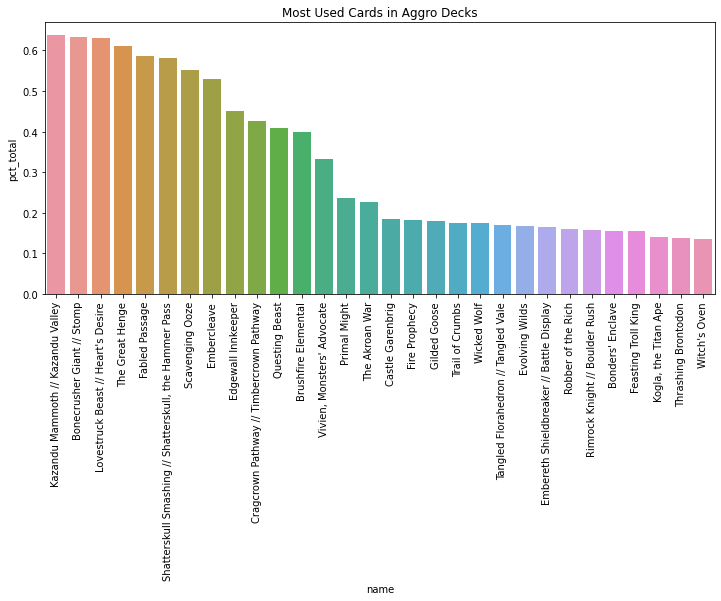

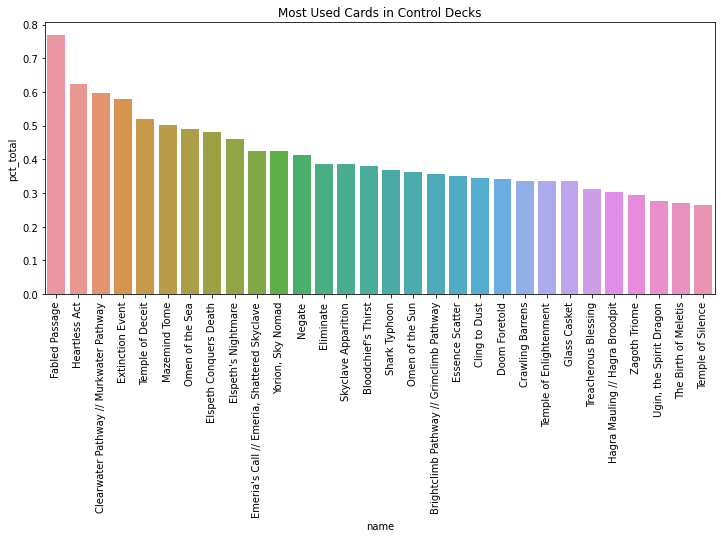

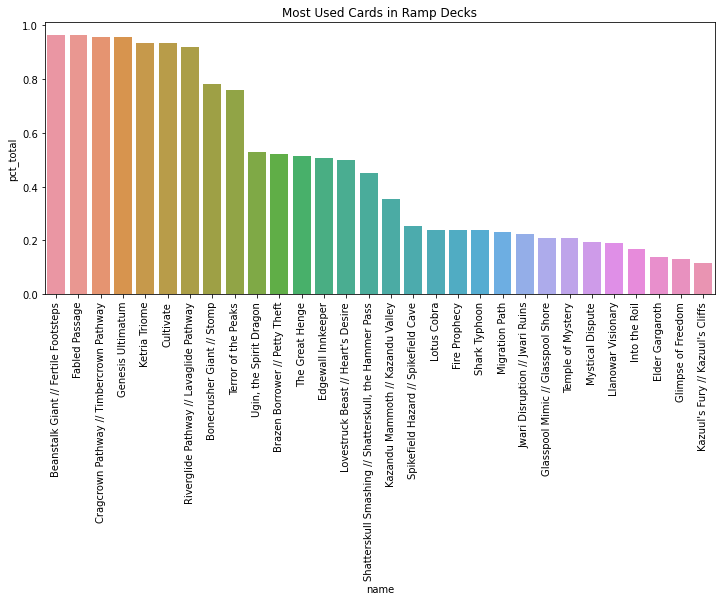

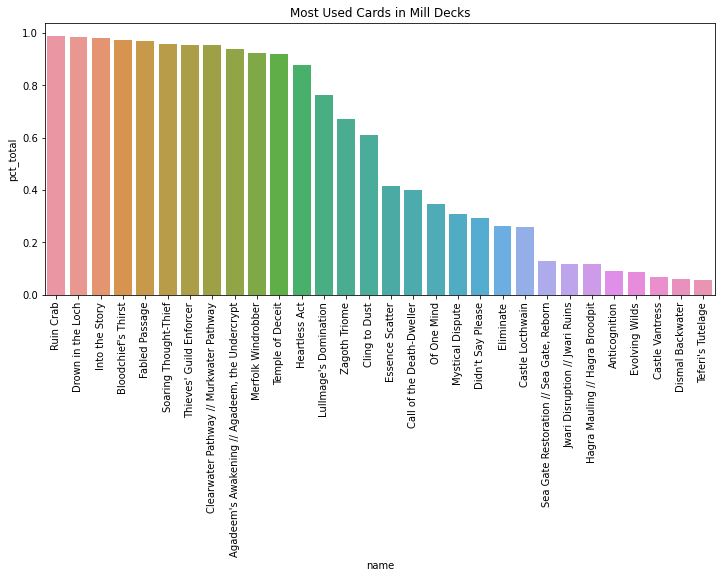

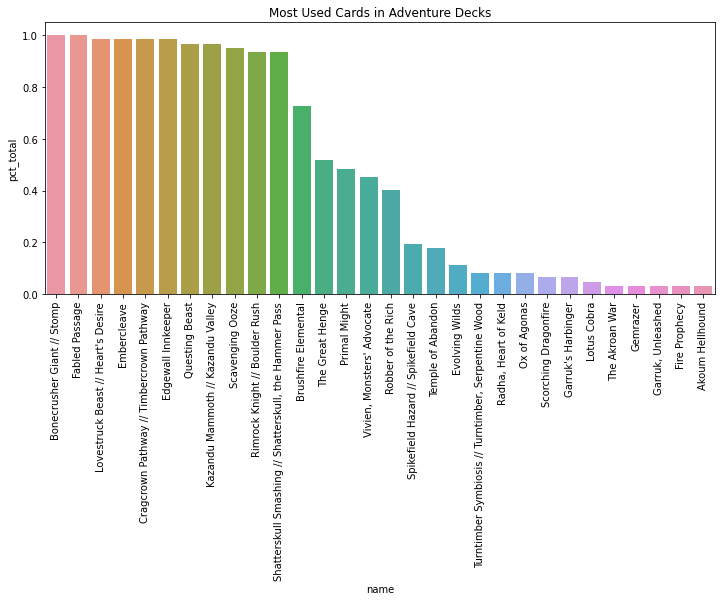

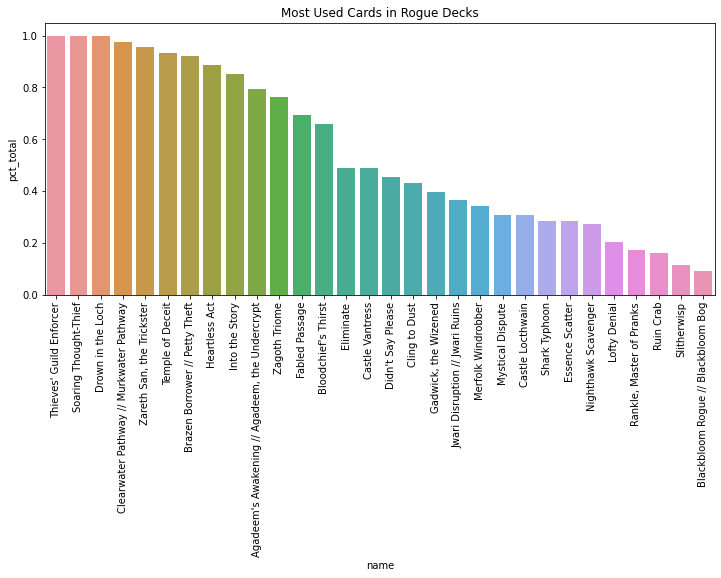

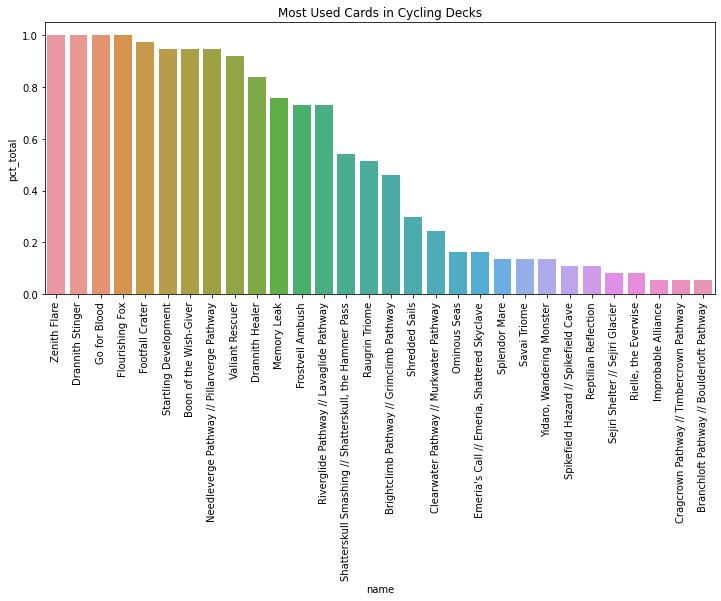

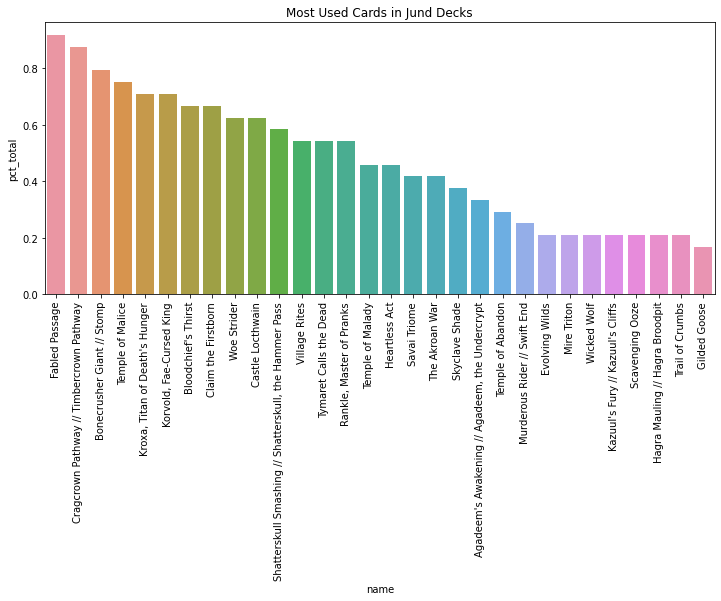

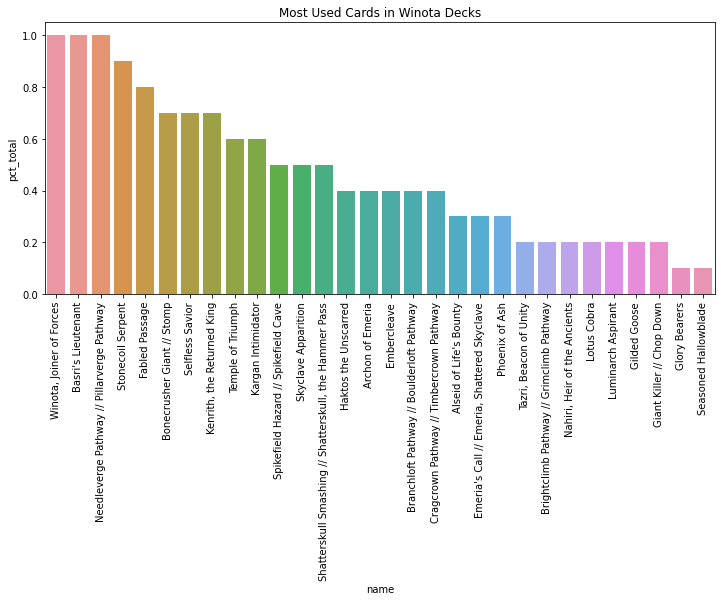

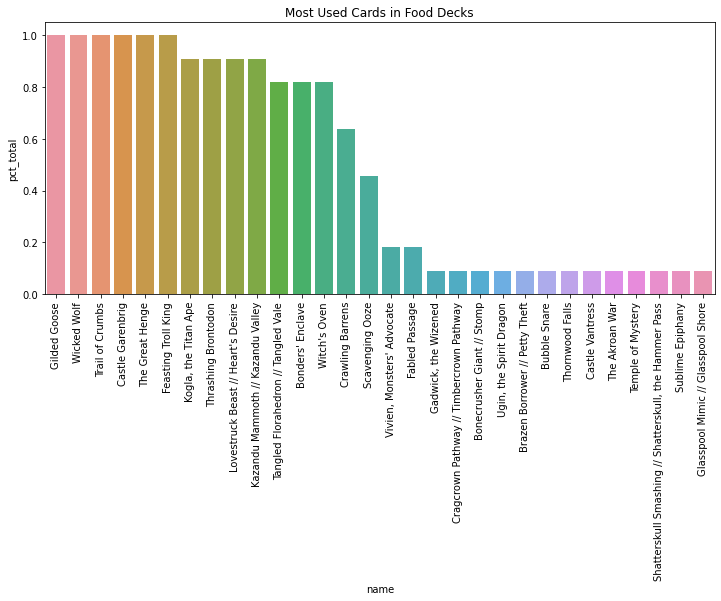

In [62]:
def top_10_archetypes(df):
    top_10_archetypes = deck_table["archetype"].value_counts().index[:10]
    for archetype in top_10_archetypes:
        most_used_cards_in_archetype(df, archetype)

top_10_archetypes(main_decks)

In [63]:
def most_used_cards_in_category(df, category):
    this_df = df[df["category"] == category].copy()
    grouped_df = (
        this_df.groupby("name")["deckId"]
        .nunique()
        .reset_index()
        .sort_values(by="deckId", ascending=False)
    )
    grouped_df["pct_total"] = grouped_df["deckId"] / this_df["deckId"].nunique()
    plt.figure(figsize=(12, 5))
    sns.barplot(data=grouped_df.iloc[:25], x="name", y="pct_total")
    plt.title(f"The Top Cards for {category.title()} Decks")
    plt.xticks(rotation=90)
    plt.show()

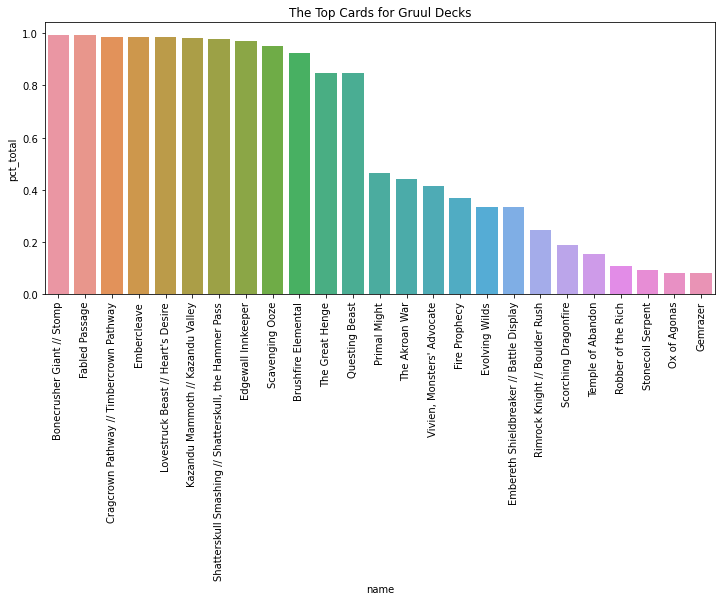

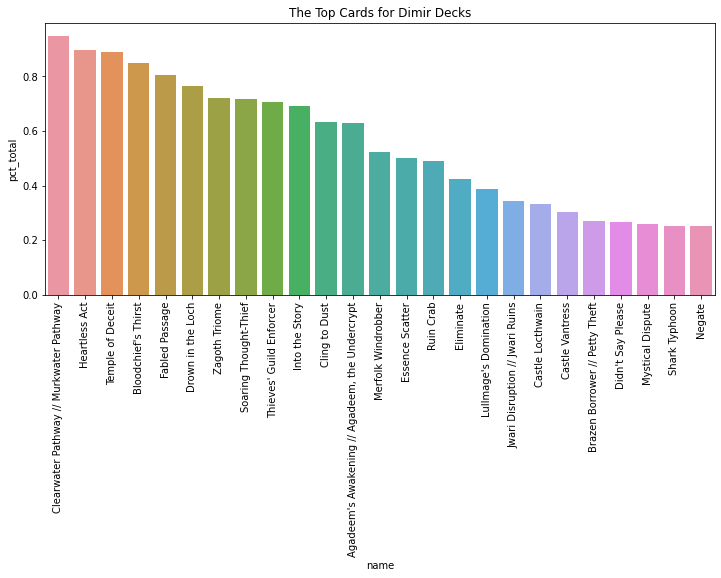

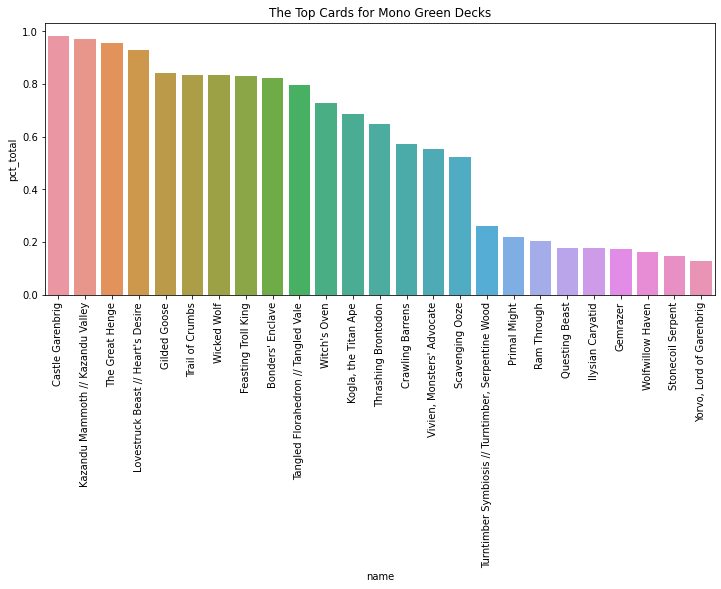

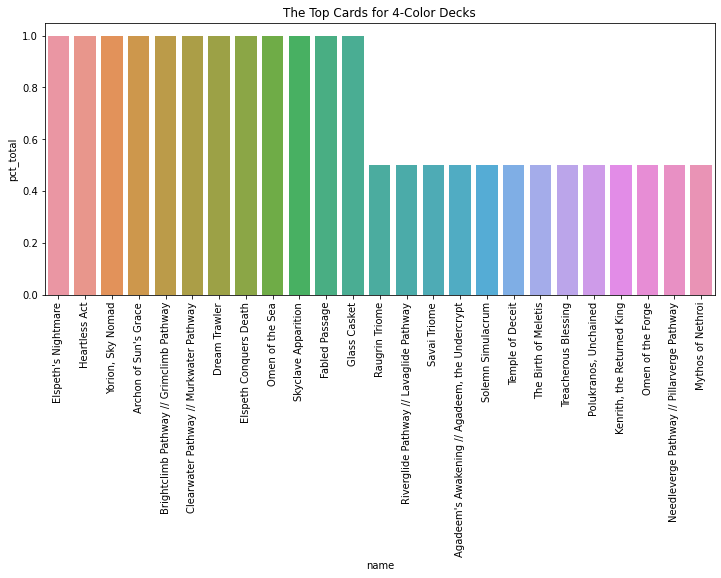

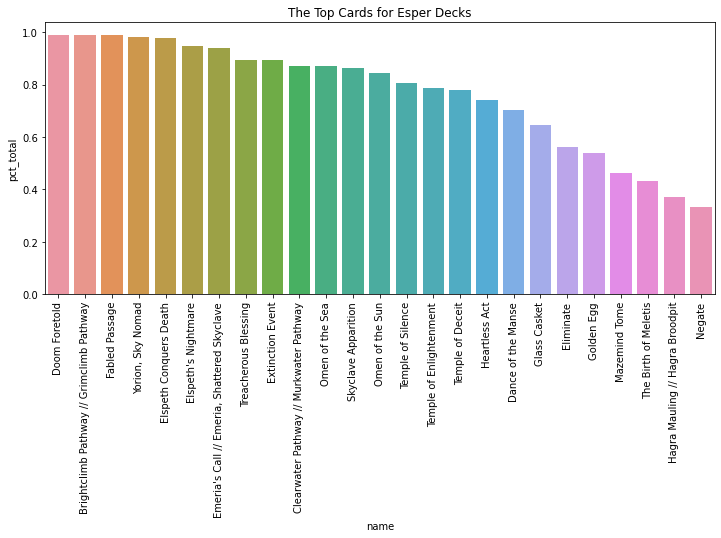

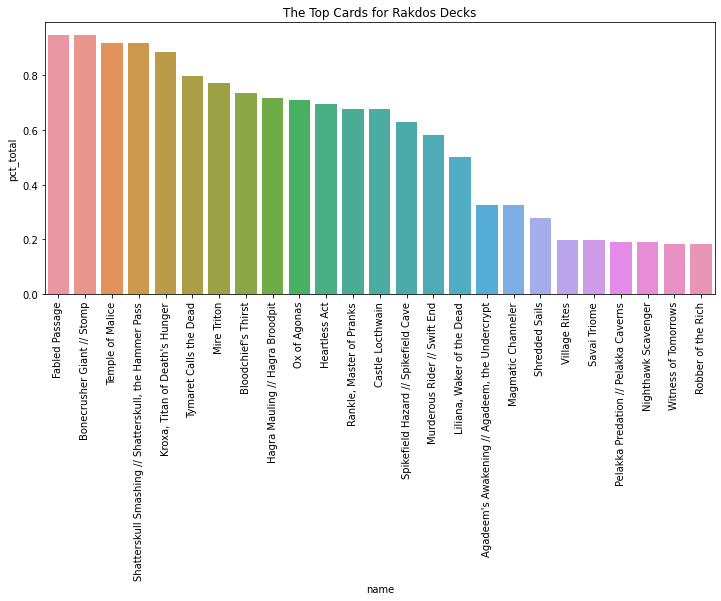

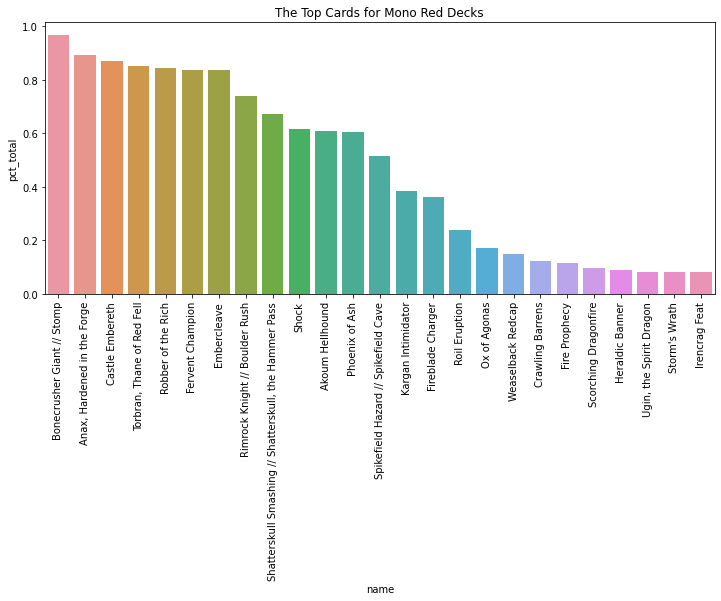

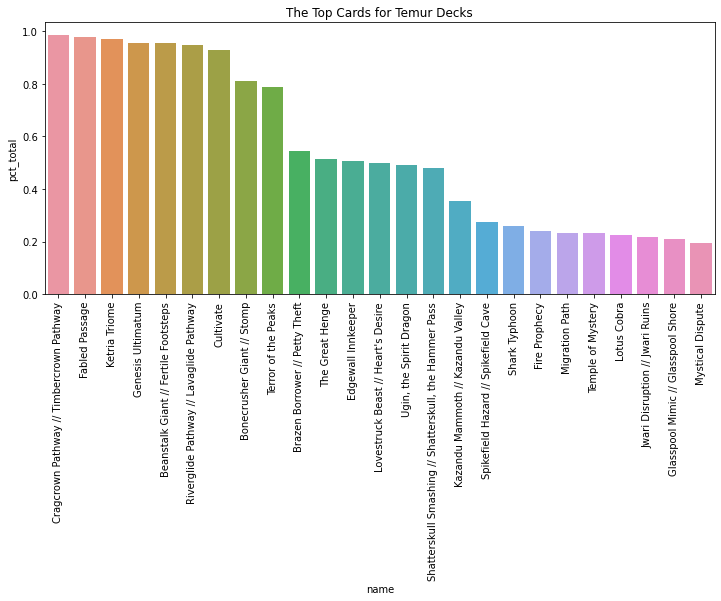

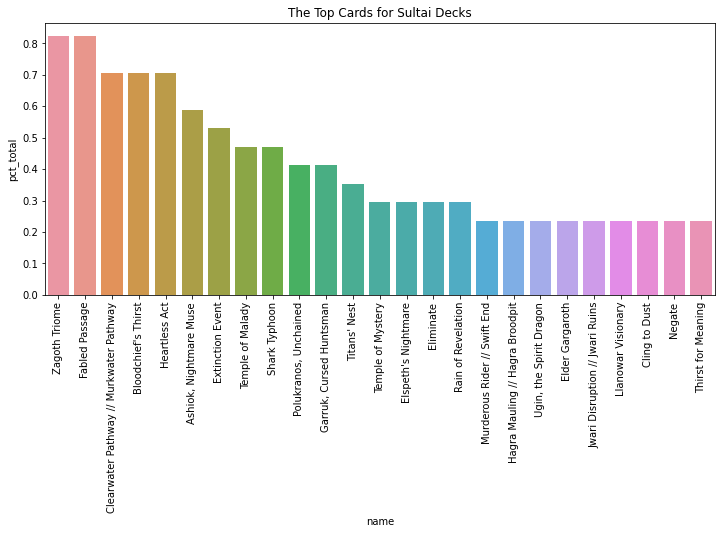

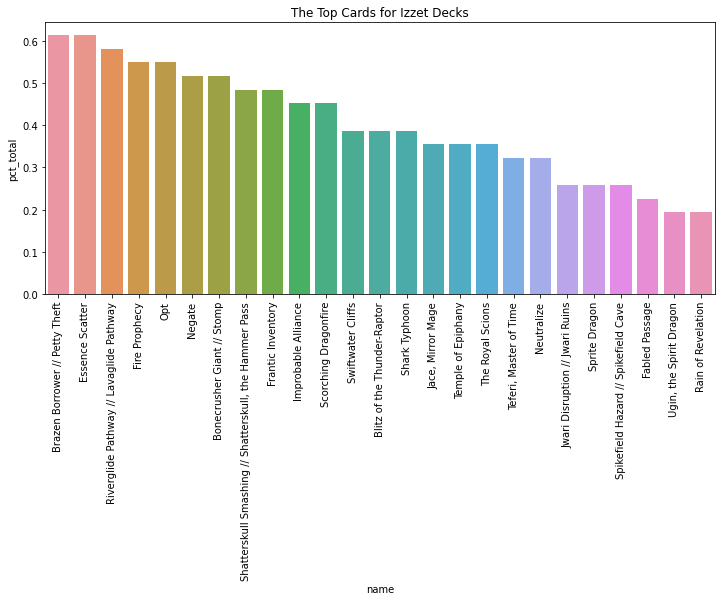

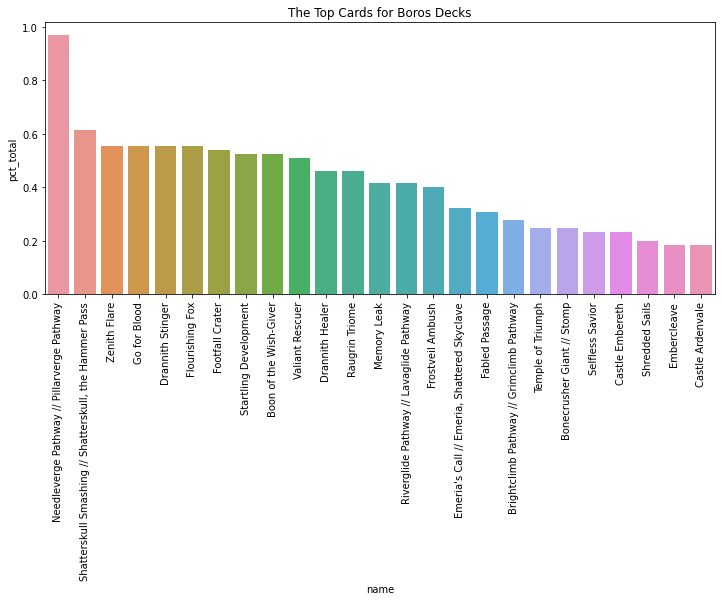

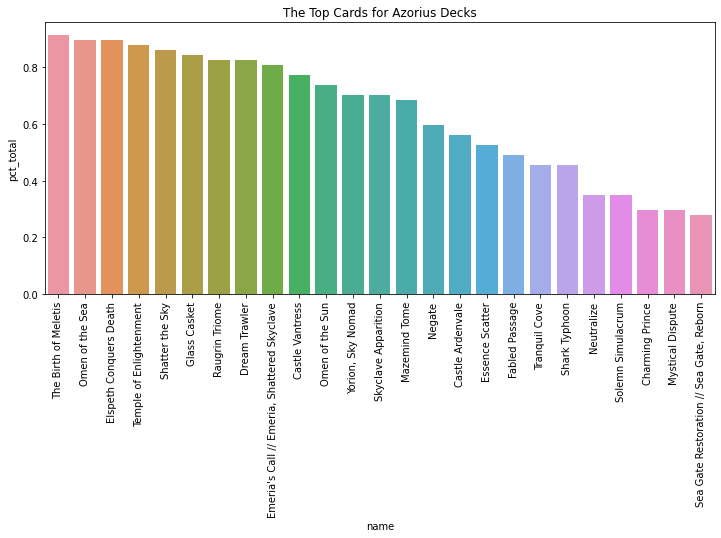

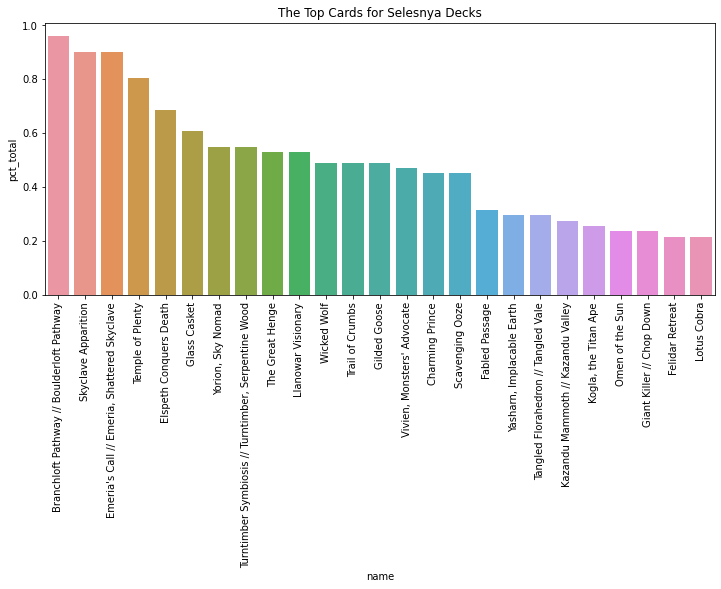

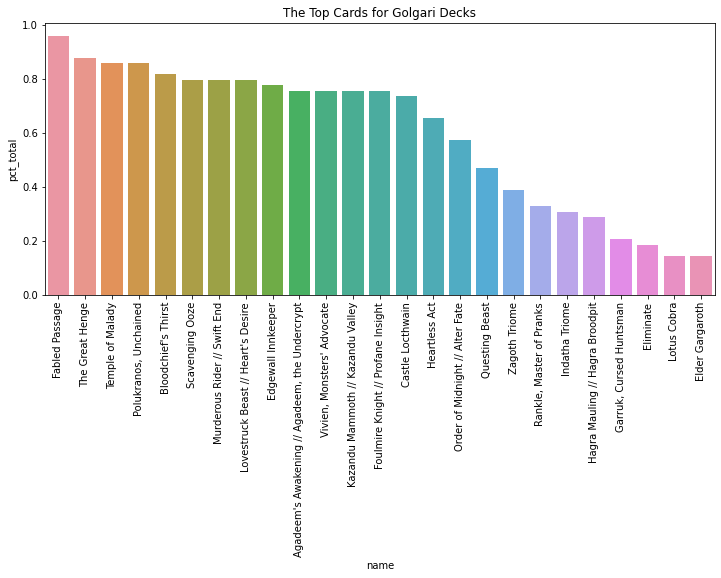

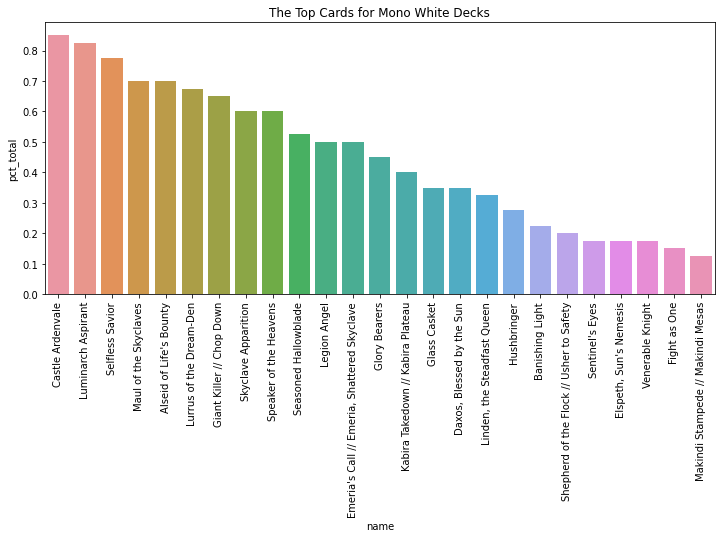

In [64]:
def top_15_categories(df):
    top_15_categories = deck_table["category"].value_counts().index[:15]
    for category in top_15_categories:
        most_used_cards_in_category(df, category)

top_15_categories(main_decks)

In [65]:
def cards_per_deck_by_set(df, unique_cards=False):
    this_df = df[df["deckId"].isin(first_place_decks["deckId"])].copy()
    if unique_cards:
        this_df.drop_duplicates(subset="name", inplace=True)
    this_df["set"] = this_df["cardId"].str.extract(r"(\d{3})(\w{3})")[1]
    sns.countplot(x=this_df["set"], order=this_df["set"].value_counts().index)
    plt.show()
    

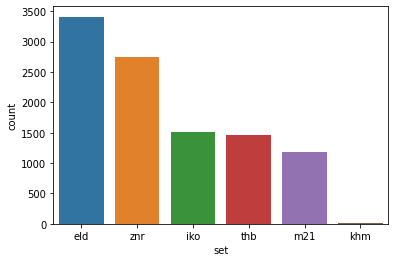

In [66]:
cards_per_deck_by_set(main_decks)

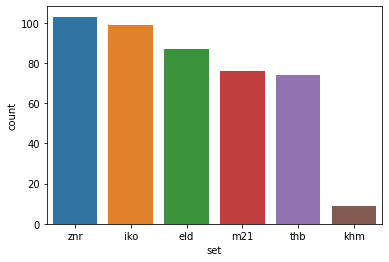

In [67]:
cards_per_deck_by_set(main_decks,unique_cards=True)